Loading Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression

Loading Dataset

In [67]:
data=pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Preprocessing dataset

In [68]:
data.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [70]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Converting all strings to numerical values

In [71]:
label_encoder=LabelEncoder()

In [72]:
data['CarName']=label_encoder.fit_transform(data['CarName'])
data['fueltype']=label_encoder.fit_transform(data['fueltype'])
data['aspiration']=label_encoder.fit_transform(data['aspiration'])
data['doornumber']=label_encoder.fit_transform(data['doornumber'])
data['carbody']=label_encoder.fit_transform(data['carbody'])
data['drivewheel']=label_encoder.fit_transform(data['drivewheel'])
data['enginelocation']=label_encoder.fit_transform(data['enginelocation'])
data['enginetype']=label_encoder.fit_transform(data['enginetype'])
data['cylindernumber']=label_encoder.fit_transform(data['cylindernumber'])
data['fuelsystem']=label_encoder.fit_transform(data['fuelsystem'])

In [73]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [74]:
data=data.drop(['car_ID'],axis=1)

In [75]:
data.shape

(205, 25)

Removing Outliers

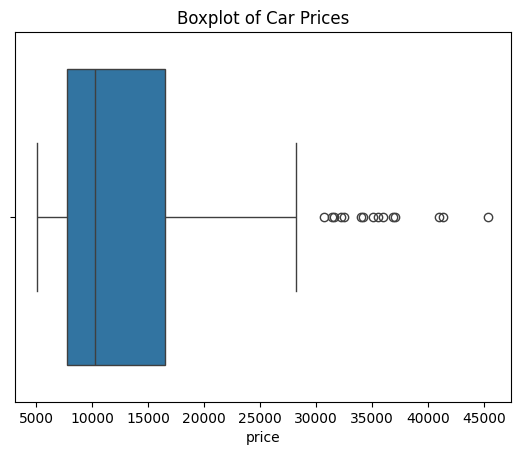

In [76]:
sns.boxplot(x=data['price'])
plt.title('Boxplot of Car Prices')
plt.show()

we can use either Capping or Dropping
here Choosen Droping

In [78]:
q1=data['price'].quantile(0.25)
q3=data['price'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
outliers=data[(data['price']<lower_bound) | (data['price']>upper_bound)]
data=data.drop(outliers.index)
data.shape

(188, 25)

In [64]:
data.shape

(205, 25)

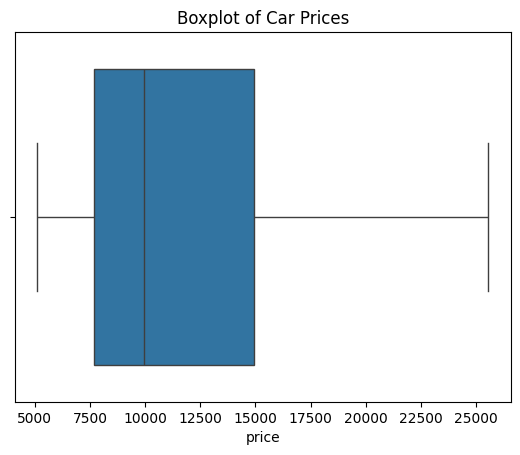

In [79]:
sns.boxplot(x=data['price'])
plt.title('Boxplot of Car Prices')
plt.show()

Correlations

In [80]:
correlation_matrix = data.corr()
correlations = correlation_matrix['price'].sort_values(ascending=False)
print(correlations)

price               1.000000
curbweight          0.843003
carwidth            0.774570
horsepower          0.746000
carlength           0.731277
enginesize          0.730507
wheelbase           0.652122
fuelsystem          0.637101
drivewheel          0.539366
boreratio           0.494913
aspiration          0.383831
carheight           0.225958
cylindernumber      0.102748
carbody             0.098458
compressionratio    0.093315
stroke              0.035950
CarName            -0.027503
peakrpm            -0.083492
enginetype         -0.085150
symboling          -0.096508
fueltype           -0.143345
doornumber         -0.160303
citympg            -0.691979
highwaympg         -0.696985
enginelocation           NaN
Name: price, dtype: float64


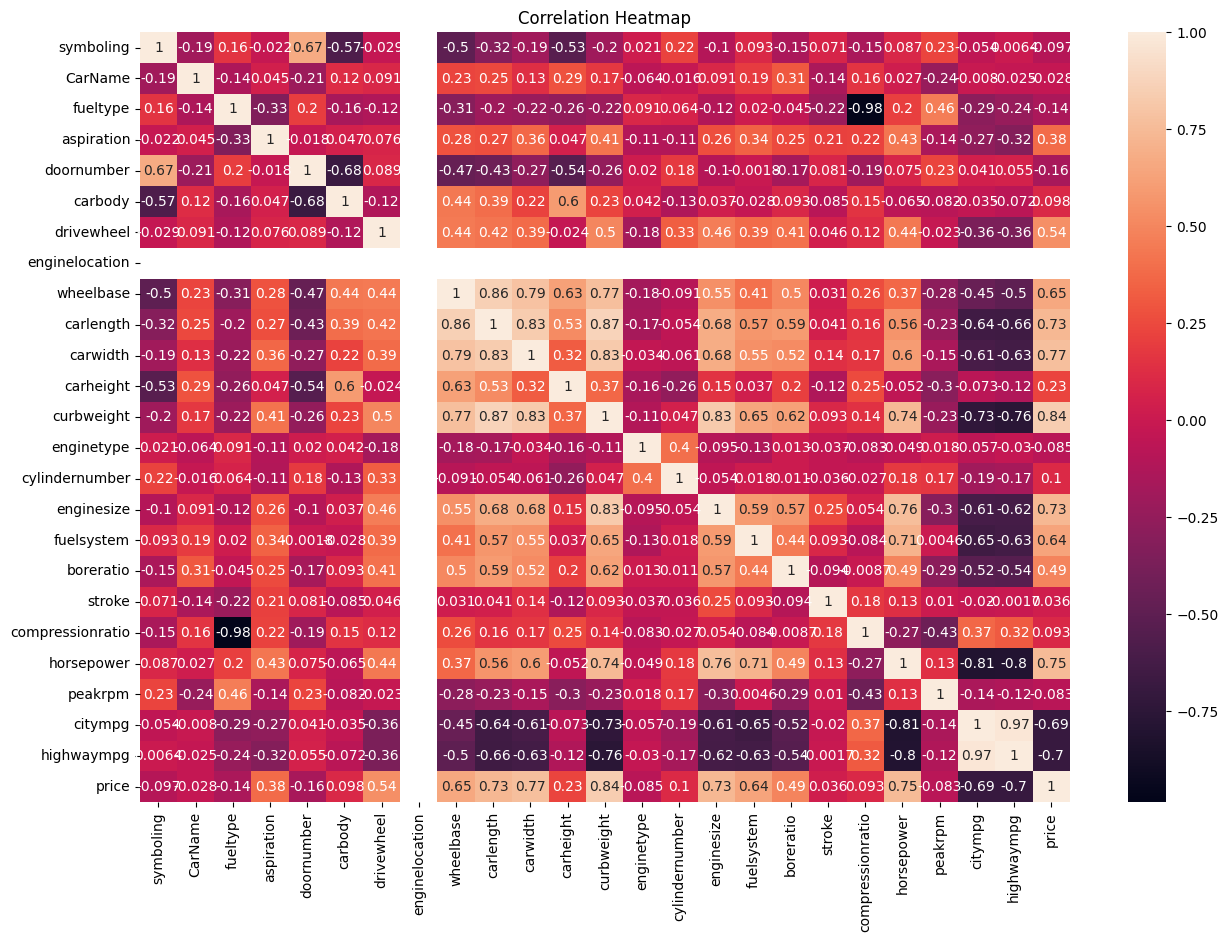

In [81]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-82-152cdd42ef2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


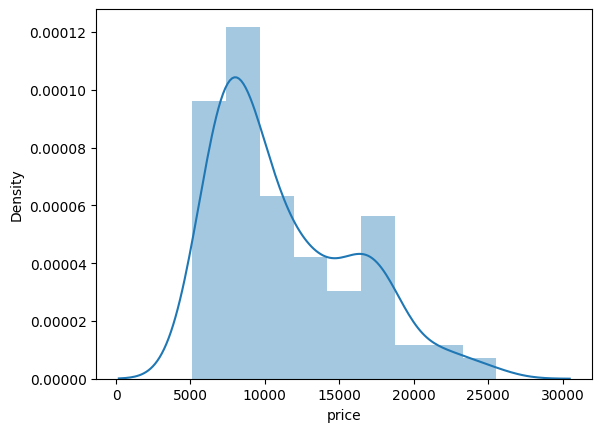

In [82]:
sns.distplot(data['price'])
plt.show()

In [85]:
x=data.drop('price',axis=1)
y=data['price']

Feature Importance Analysis

In [86]:
feature_names=x.columns
selector=SelectKBest(score_func=f_regression,k=6)
selector.fit(x,y)
selected_features=x.columns[selector.get_support()]
print(selected_features)

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'highwaympg'],
      dtype='object')


In [87]:
rf_selector=RandomForestRegressor(n_estimators=100,random_state=42)
rf_selector.fit(x,y)
feature_importances=pd.DataFrame({'Features':x.columns,'Importance':rf_selector.feature_importances_})
feature_importances=feature_importances.sort_values(by='Importance',ascending=False)
print(feature_importances)

            Features  Importance
12        curbweight    0.661040
23        highwaympg    0.080196
1            CarName    0.055029
20        horsepower    0.054850
10          carwidth    0.045386
8          wheelbase    0.013781
21           peakrpm    0.012946
15        enginesize    0.011931
9          carlength    0.010216
11         carheight    0.008783
18            stroke    0.008348
22           citympg    0.007497
19  compressionratio    0.005712
5            carbody    0.004553
17         boreratio    0.004262
16        fuelsystem    0.003574
6         drivewheel    0.003479
0          symboling    0.002381
3         aspiration    0.002078
14    cylindernumber    0.001732
13        enginetype    0.001384
4         doornumber    0.000495
2           fueltype    0.000347
7     enginelocation    0.000000


Training the Model

In [88]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [90]:
models={'Linear Regression':LinearRegression(),
        'Decision Tree':DecisionTreeRegressor(),
        'Random Forest':RandomForestRegressor(),
        'Gradient Boosting':GradientBoostingRegressor(),
        'Support Vector Machine':SVR()}

In [91]:
results={}
for name,model in models.items():
    print(f'Training {name} model...')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    results[name]={'Mean Squared Error':mean_squared_error(y_test,y_pred),
                   'R2 Score':r2_score(y_test,y_pred),
                   'Mean Absolute Error':mean_absolute_error(y_test,y_pred)}

Training Linear Regression model...
Training Decision Tree model...
Training Random Forest model...
Training Gradient Boosting model...
Training Support Vector Machine model...


Evaluation All the Models and Finding the Best among them Comparing R2Score

In [102]:
for name,metrics in results.items():
    print(f'{name} Model:')
    for metric_name,metric_value in metrics.items():
        print(f'{metric_name}:{metric_value:.4f}')
    print()

Linear Regression Model:
Mean Squared Error:3901885.1686
R2 Score:0.7650
Mean Absolute Error:1566.9346

Decision Tree Model:
Mean Squared Error:5515050.8807
R2 Score:0.6678
Mean Absolute Error:1651.7851

Random Forest Model:
Mean Squared Error:3226476.9422
R2 Score:0.8057
Mean Absolute Error:1230.6630

Gradient Boosting Model:
Mean Squared Error:3369416.7720
R2 Score:0.7970
Mean Absolute Error:1197.9010

Support Vector Machine Model:
Mean Squared Error:17527700.3278
R2 Score:-0.0558
Mean Absolute Error:3409.3344



In [103]:
best_model_name=max(results,key=lambda x:results[x]['R2 Score'])
best_model=models[best_model_name]
print(f' best model :- {best_model_name}')

 best model :- Random Forest


Hyperparameter Tuning

In [104]:
if isinstance(best_model,RandomForestRegressor):
  param_grid={'n_estimators':[100,200],'max_depth':[5,10],'min_samples_split':[2,5]}
elif isinstance(best_model,GradientBoostingRegressor):
  param_grid={'n_estimators':[100,200],'learning_rate':[0.01,0.1],'max_depth':[3,5]}
elif isinstance(best_model,SVR):
  param_grid={'C':[0.1,1],'kernel':['linear','rbf'],'gamma':['scale','auto']}
else:
  param_grid={}

In [105]:
if param_grid:
  gridsearch=GridSearchCV(best_model,param_grid,cv=5,scoring='r2')
  gridsearch.fit(X_train,y_train)
  best_model=gridsearch.best_estimator_
  print('best parameters:',gridsearch.best_params_)

best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


Saving the best Model that fits to this dataset

In [106]:
import joblib
joblib.dump(best_model,'best_model_car_price_prediction.joblib')
print('model saved')

model saved


Final Testing data with unseen datas

In [107]:
final_prediction=best_model.predict(X_test)
final_metrics={'Mean Squared Error':mean_squared_error(y_test,final_prediction),
               'R2 Score':r2_score(y_test,final_prediction),
               'Mean Absolute Error':mean_absolute_error(y_test,final_prediction)}


In [108]:
for metric_name,metric_value in final_metrics.items():
    print(f'{metric_name}:{metric_value:.4f}')

Mean Squared Error:3492594.9091
R2 Score:0.7896
Mean Absolute Error:1220.1988
